# <center>Heart Attack Analysis and Prediction</center> 
![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCzadnw7uis8jeaRLY4IPaoIcayVTlMVXTLk0yKTtzVsG7_1-ikIjzN4fPSMtS_De2AvY&usqp=CAU)
## <center> *Presented By:* </center>
### <center> *Sarah Ibrahim : 91830218* </center>
### <center> CSCI521 Machine Learning </center>
### <center> Supervised by: Dr. Nazih SALHAB </center>
---

Table Of Our Project Content:

1. [Introduction](#1) 
    - 1.1 [DataSet Dictionary](#2)
    - 1.2 [Objective](#3)
    
2. [The DataSet](#4)
    - 2.1 [Used Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Data Understanding](#7)
    
3. [Exploring the data](#8)
    - 3.1 [Count plot for categorical features](#9)
    - 3.2 [Boxen plot for Continuous Features](#10)
    - 3.3 [Distribution according to the target](#11)
    - 3.4 [Correlation Matrix](#12)
    - 3.5 [Scatter Matrix](#13)
4. [Data PreProcessing](#14)
    - 4.1 [Standardization](#15)
5. [Data Modeling](#16)
    - 5.1 [ K-Nearest Neighbors Classifier ](#17)
    - 5.2 [ Gaussian Naive Bayes ](#18)
    - 5.3 [ Logistic Regression Classifier ](#19)
    - 5.4 [ Decision Tree Classifier ](#20)
    - 5.5 [ Random Forest Classifier](#21)
    - 5.6 [ Gradient Boosting Classifier ](#22)
6. [Models Evaluation](#23)
7. [Conclusion](#24)

### 1. Introduction <a id=1></a>

> A variety of illnesses that affect your heart are referred to as cardiovascular disease or heart disease. Blood vessel illnesses, such as coronary artery disease, are included in the category of diseases referred to as heart disease. According to WHO data, 17.9 million people die from heart disease each year. According to the medical study, this heart condition is primarily caused by human lifestyle. In addition to this, there are a number of important indicators that can indicate whether or not a person will develop heart disease.
Many factors may be more likely to develop heart disease as age, cholesterol, blood pressure, etc.
In this research, we look at whether a person with these factors is at risk for heart disease and we will precise the relation between obesity, depression, stress and the heart attack with many analysis!



> We choose to answer the following questions about heart disease: 
> +	Is this person at risk to have heart disease in the near future?
> +   Looking at all the features, what is the best predictor of Heart diseases?
> +	We hypothesized that there might be a correlation between obesity and this.

**About the DataSet**
> The data in this collection relates to cardiac disease. The class variable, which is the target of the 13 columns in the dataset, is influenced by the other 12 columns. Here, the goal is to use various machine learning algorithms to categorize the objective variable into disease and non-disease categories and determine which approach is best for this dataset.

> Using the provided attributes below, use this dataset to identify the patients who are most likely to have a heart condition in the near future.
This data comes from the University of California Irvine's Machine Learning Repository. Contains about 300 rows of data.
https://github.com/chayandatta/Heart_disease_prediction/blob/5f53d35527e0f4a7cde9b95ada310c66a6402558/heart.csv

#### 1.1 DataSet Dictionary <a id=2></a>

`age` - Age of the patient

`sex` - Gender of the patient ~ 0=female , 1=male

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`target` - Output vector

#### 1.2 Objective <a id=3></a>
> Our goal is to develop appropriate machine learning techniques that can categorize heart disease more correctly and help people and health organizations prevent heart disorders and compare different ML algorithms!

## 2. The Dataset  <a id=4></a>


#### 2.1 Packages <a id=5></a>

> **NumPy:** The Python package NumPy is used to manipulate arrays. Additionally, it has matrices, fourier transform, and functions for working in the area of linear algebra. In the year 2005, Travis Oliphant developed NumPy. You can use it for free because it is an open source project.
___
> **Pandas:** Pandas is an open-source library designed primarily for working quickly and logically with relational or labeled data. It offers a range of data structures and procedures for working with time series and numerical data. The NumPy library serves as the foundation for this library. Pandas is quick and offers its users exceptional performance & productivity.
___
> **Matplotlib:** is a complete package for building static, animated, and interactive visualizations in Python that supports 2D plotting. Matplotlib creates publication-quality figures in a range of physical formats and in cross-platform interactive settings. Python scripts, the Python and IPython shells, web application servers, and a number of graphical user interface toolkits can all use Matplotlib.
___
> **Seeborn:** Python's Seaborn package allows you to create statistical visuals. It incorporates tightly with Pandas data structures and is built upon Matplotlib. You may examine and comprehend your data with Seaborn. Its charting functions work with dataframes and arrays that include entire datasets, and they internally carry out the semantic mapping and statistical aggregation required to make useful graphs. You may concentrate on the meaning of the various plot parts rather than the specifics of how to design them thanks to its dataset-oriented, declarative API.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
#import plotly.graph_objects as go
#import plotly.express as px

#### 2.2 Data <a id=6></a>
Let's handle the data locally.

In [2]:
df = pd.read_csv("heart.csv")

#### 2.3 Data Understanding<a id=7></a>

 **Preview of the first 5 rows of dataset**

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dfPos = df.loc[df['target'] == 1]


**Check any missing value**

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**The shape of the dataset**
___

Now, let’s see the shape of our dataset

In [6]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (303, 14)


We have a dataset with 303 instance of data with 14 attributes.

**Let’s see the type and size of each feature that our dataset has.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Out of 14 features, we have 13 int types and only one with the float data types.

**Some counting values**

In [8]:
print(df['sex'].value_counts())
print('_______________')
print(df['slope'].value_counts())
print('_______________')
print(df['target'].value_counts())
print('_______________')

1    207
0     96
Name: sex, dtype: int64
_______________
2    142
1    140
0     21
Name: slope, dtype: int64
_______________
1    165
0    138
Name: target, dtype: int64
_______________


**Checking the number of unique values in each column**

In [9]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(dict, index=["unique value count"]).transpose()

,unique value count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


**Separating Continuous, Categorical and target variables**

In [10]:
cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["target"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['target']


In [11]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### 3. Exploring the data  <a id=8></a>
**In the Exploring the data section, graphs and tables will be generated for the interesting features.**

#### 3.1 Count plot for categorical features <a id=9></a>

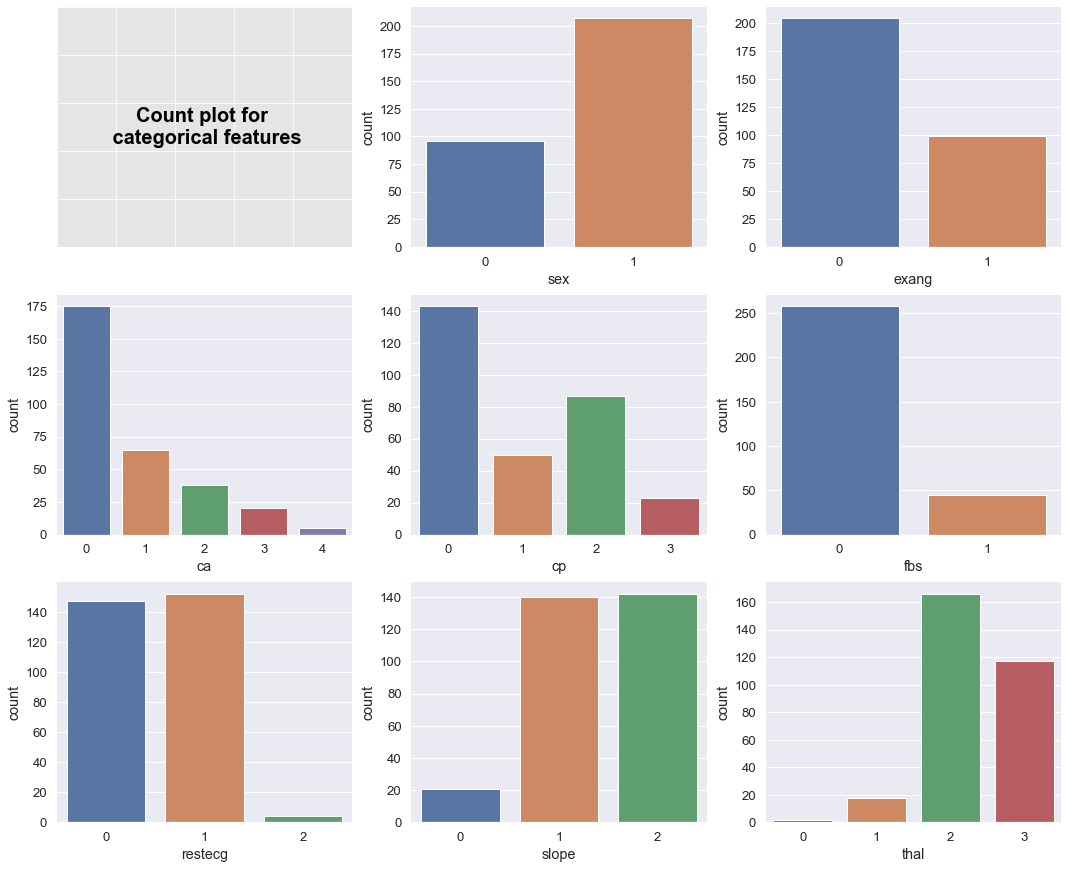

In [12]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Count plot for \n categorical features", 
         horizontalalignment='center', 
         verticalalignment='center',
        fontsize='20', fontweight='bold')
sns.set(font_scale = 1.2)
ax1 = fig.add_subplot(gs[0,1])
sns.countplot(data=df, x=cat_cols[0], ax=ax1)

ax2 = fig.add_subplot(gs[0,2])
sns.countplot(data=df, x=cat_cols[1], ax=ax2)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=df, x=cat_cols[2], ax=ax3)

ax4 = fig.add_subplot(gs[1,1])
sns.countplot(data=df, x=cat_cols[3], ax=ax4)

ax5 = fig.add_subplot(gs[1,2])
sns.countplot(data=df, x=cat_cols[4], ax=ax5)

ax6 = fig.add_subplot(gs[2,0])
sns.countplot(data=df, x=cat_cols[5], ax=ax6)

ax7 = fig.add_subplot(gs[2,1])
sns.countplot(data=df, x=cat_cols[6], ax=ax7)

ax8 = fig.add_subplot(gs[2,2])
sns.countplot(data=df, x=cat_cols[7], ax=ax8)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='target'>

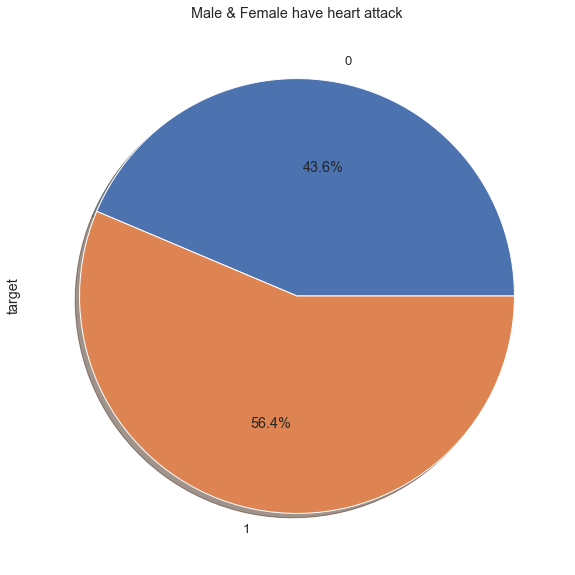

In [13]:
dfPos.groupby('sex')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

<AxesSubplot:title={'center':'Thallium '}, ylabel='target'>

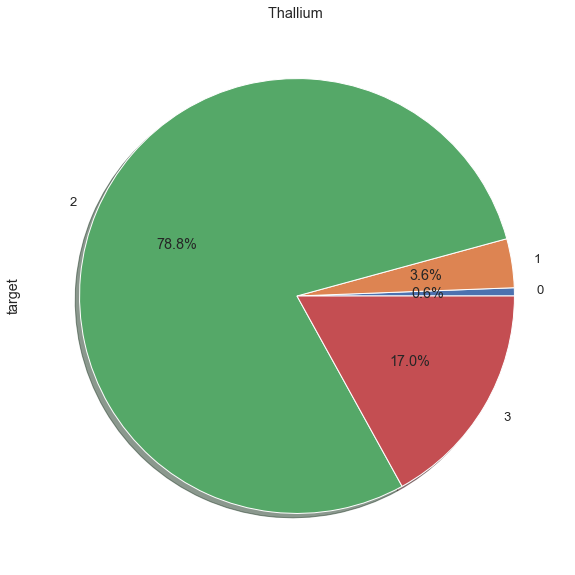

In [14]:
dfPos.groupby('thal')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Thallium ")

<AxesSubplot:title={'center':'Exercise induced angina '}, ylabel='target'>

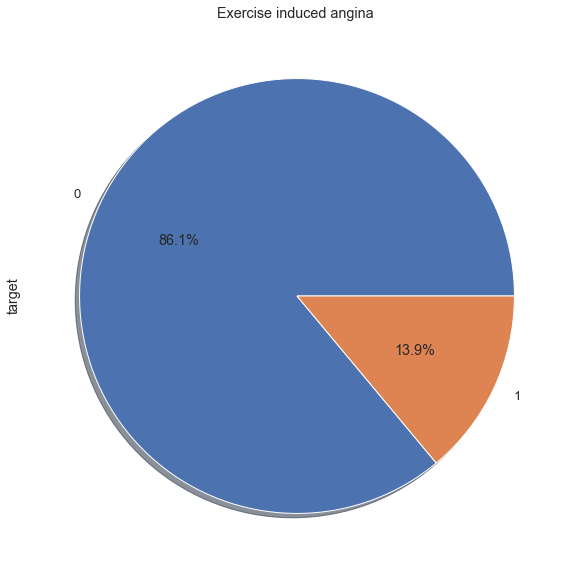

In [15]:
dfPos.groupby('exang')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Exercise induced angina ")

<AxesSubplot:title={'center':'chest pain'}, ylabel='target'>

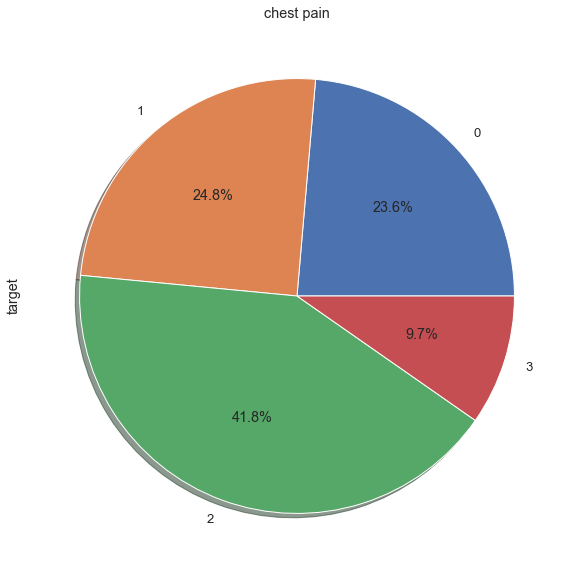

In [16]:
dfPos.groupby('cp')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="chest pain")


#### Conclusions according to the above  analysis 

> 1. There are no NaN values in our data.
> 2. The data consists of more than twice the number of people with `sex` = 1 (male) than `sex` = 0 (female).
> 3. people with 'sex' = 1 have more chance of heart attack than 'sex' =0 .
> 4.People with Non-Anginal chest pain where `cp` = 2 have higher chances of heart attack.
> 5.People with 0 major vessels where `caa` = 0 have high chance of heart attack.
> 6.People with `thall` = 2 have much higher chance of heart attack.
> 7.People with no exercise induced angina where`exng` = 0 have higher chance of heart attack.


#### 3.2 Boxen plot for Continuous Features <a id=10></a>

<AxesSubplot:xlabel='oldpeak'>

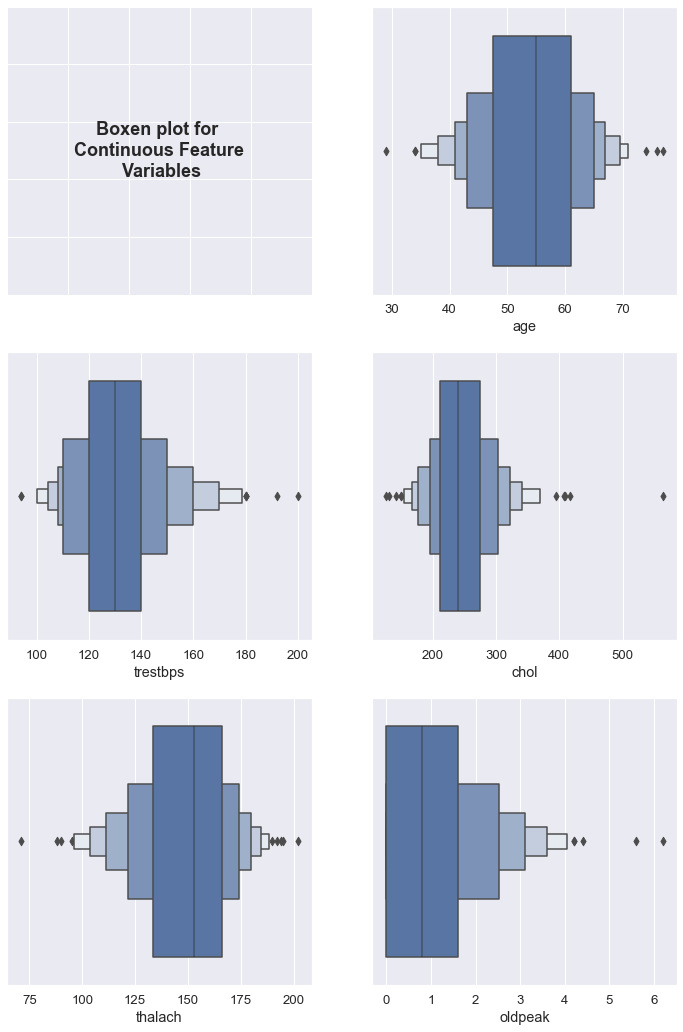

In [17]:
fig = plt.figure(figsize=(12, 18))
gs = fig.add_gridspec(3,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
sns.set(font_scale = 1.2)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Boxen plot for \n Continuous Feature \n Variables",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold')

sns.boxenplot(ax=ax1, x=df[con_cols[0]])
sns.boxenplot(ax=ax2, x=df[con_cols[1]])
sns.boxenplot(ax=ax3, x=df[con_cols[2]])
sns.boxenplot(ax=ax4, x=df[con_cols[3]])
sns.boxenplot(ax=ax5, x=df[con_cols[4]])

**There are certain outliers in all the continuous features.**

#### 3.3 Distribution according to the target <a id=11></a>

### The dataset contains a number of features that describe who have heart disease.  These will be graphed and then tables will be generated with the numbers.  The features to be examined are:

- Age(years) - `age` 
- Maximum heart rate achieved - `thalachh` 
- Resting blood pressure - `trtbps`
- Cholestoral in mg/dl fetched via BMI sensor -`chol`
- Previous peak -`oldpeak`

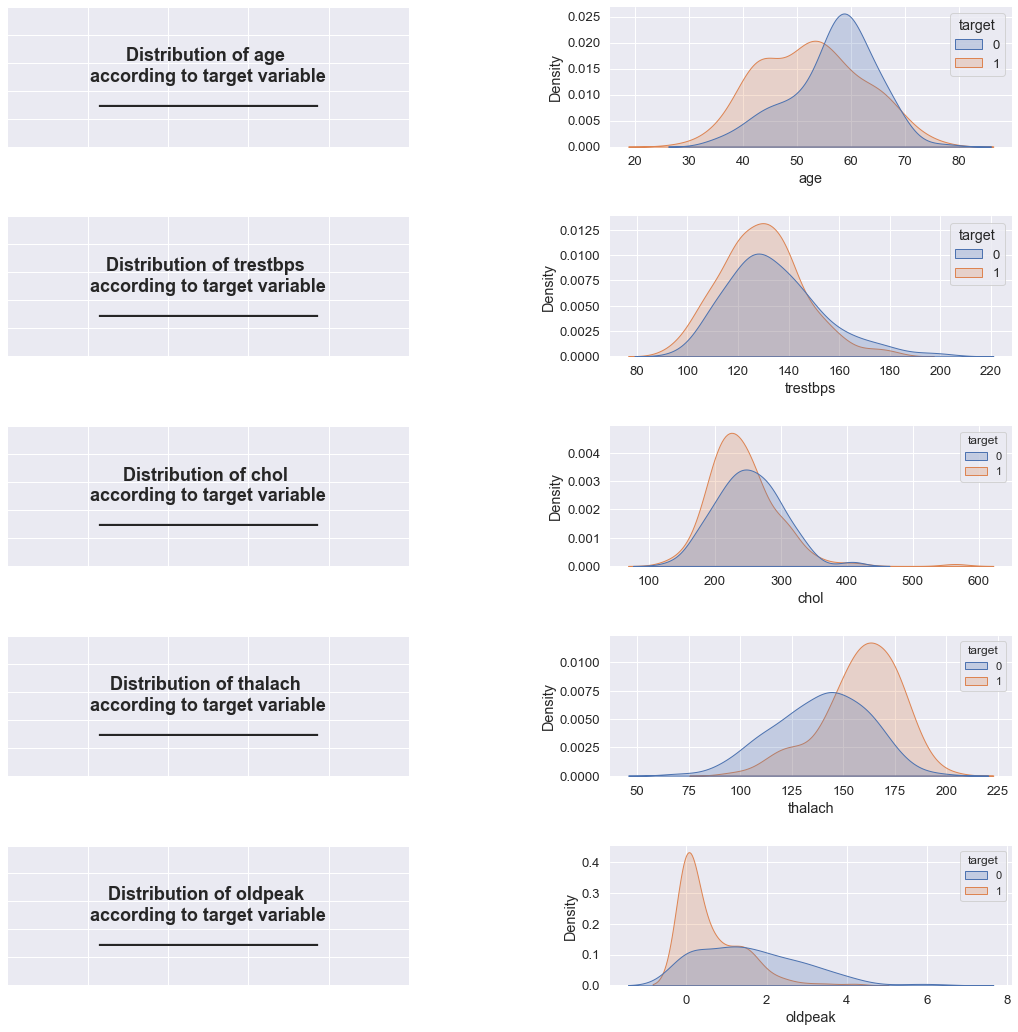

In [18]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[0]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax1, data=df, hue='target', x=con_cols[0], fill=True)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax2.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[1]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax3, data=df, hue='target', x=con_cols[1], fill=True)
sns.set(font_scale = 1)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
ax4.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[2]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax5, data=df, hue='target', x=con_cols[2], fill=True)

ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
ax6.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[3]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax7, data=df, hue='target', x=con_cols[3], fill=True)

ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
ax8.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[4]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')


sns.kdeplot(ax=ax9, data=df, hue='target', x=con_cols[4], fill=True)

for i in ['left', 'top', 'bottom', 'right']:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    
plt.show()

 Let's take some analysis from the distributions graphs above:
> + Patients with age between 55 and 67 have higher chances of heart attack.
> + Patients with higher maximum heart rate achieved have higher chances of heart attack.
> + Patients with lower pevious peak achieved have higher chances of heart attack.
> + Patients with higher cholesterol have higher chances of heart attack.

### 3.4 Correlation Matrix <a id=12></a>
> Simply said, a correlation matrix is a table that shows the correlation coefficients for various variables. The correlation between all potential pairs of values in a table is shown in the matrix. It is an effective tool for compiling a sizable dataset and for locating and displaying data patterns.

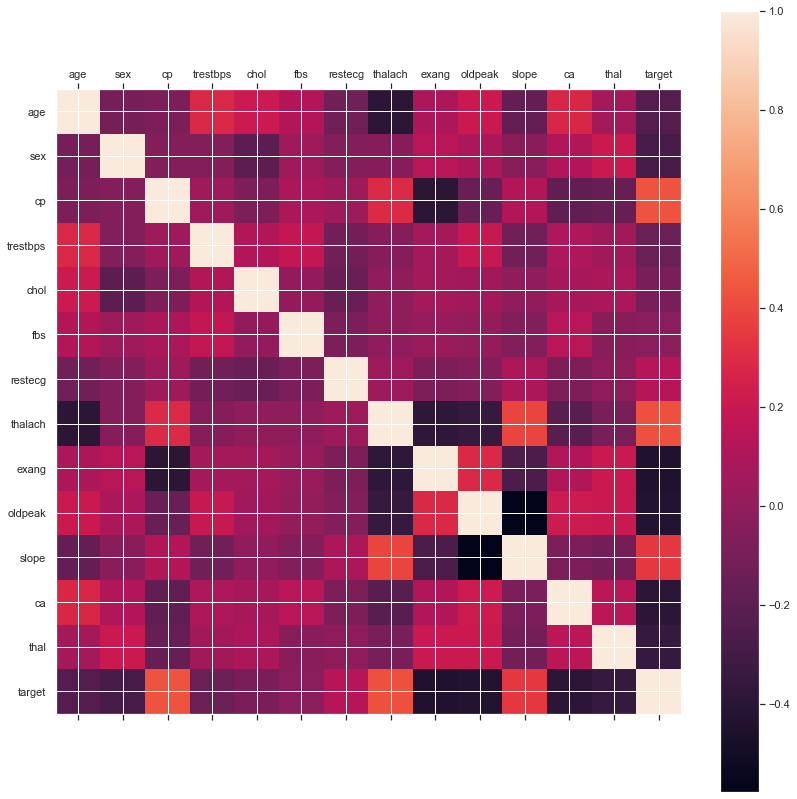

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 14
plt.rcParams.update({'font.size': 18})
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.rcParams['axes.grid'] = False
plt.colorbar()

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


We can see the correlance between all features.

**By result we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.
So, let’s correlate this!**

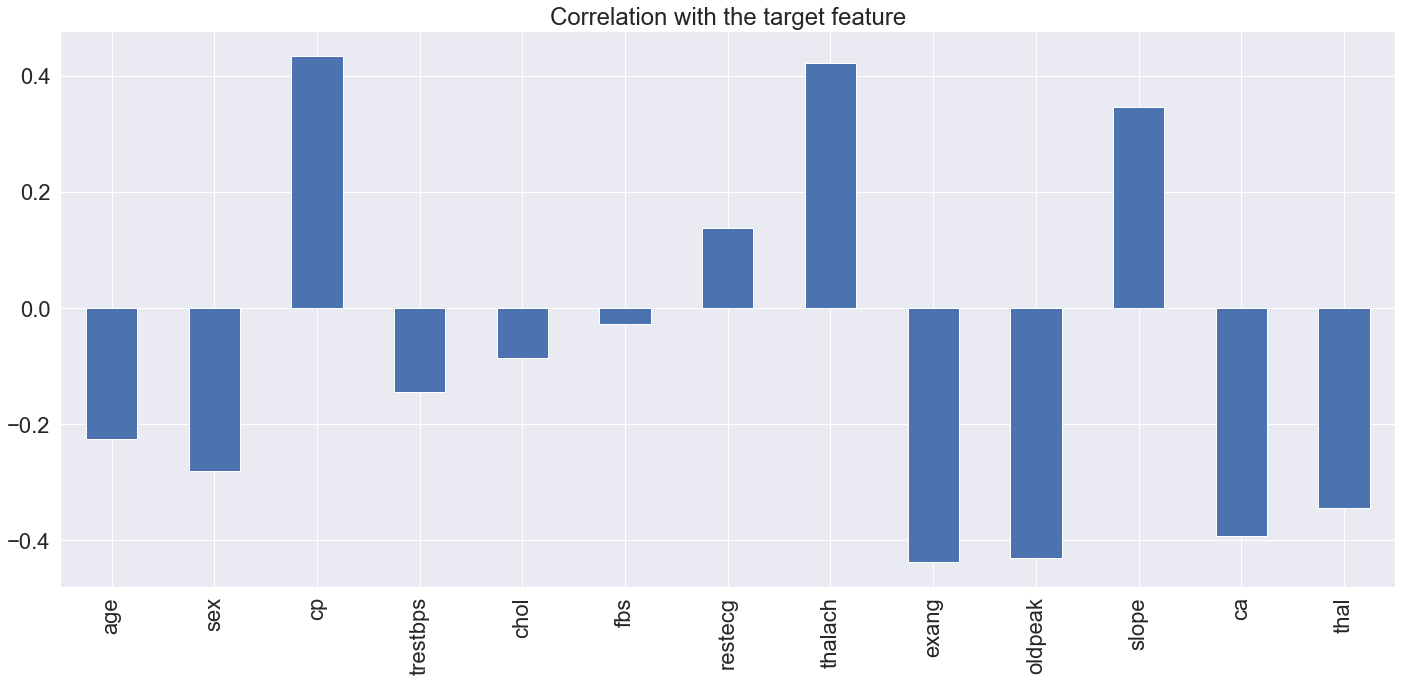

In [21]:
import seaborn as sns
sns.set_context('notebook',font_scale = 2)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

Hence, we can see that:
> + Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
> + Other features are negatively correlated with the target feature.

### 3.5 Scatter matrix <a id=13></a>
___
> An array (or matrix) of scatter plots is known as a scatter plot matrix, and it is used to show bivariate correlations between sets of variables. Numerous associations can be investigated in a single chart thanks to the scatter plots in the matrix, which each show the link between a pair of variables.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='restecg', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='exang', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='slope', ylabel='age'>,
        <AxesSubplot:xlabel='ca', ylabel='age'>,
        <AxesSubplot:xlabel='thal', ylabel='age'>,
        <AxesSubplot:xlabel='target', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='cp', ylabel='sex'>,
        <AxesSubplot:xlabel='trestbps', ylabel='sex'>,
        <AxesSubplot:xlabel='chol', ylabel='sex'>,
        <AxesSubplot

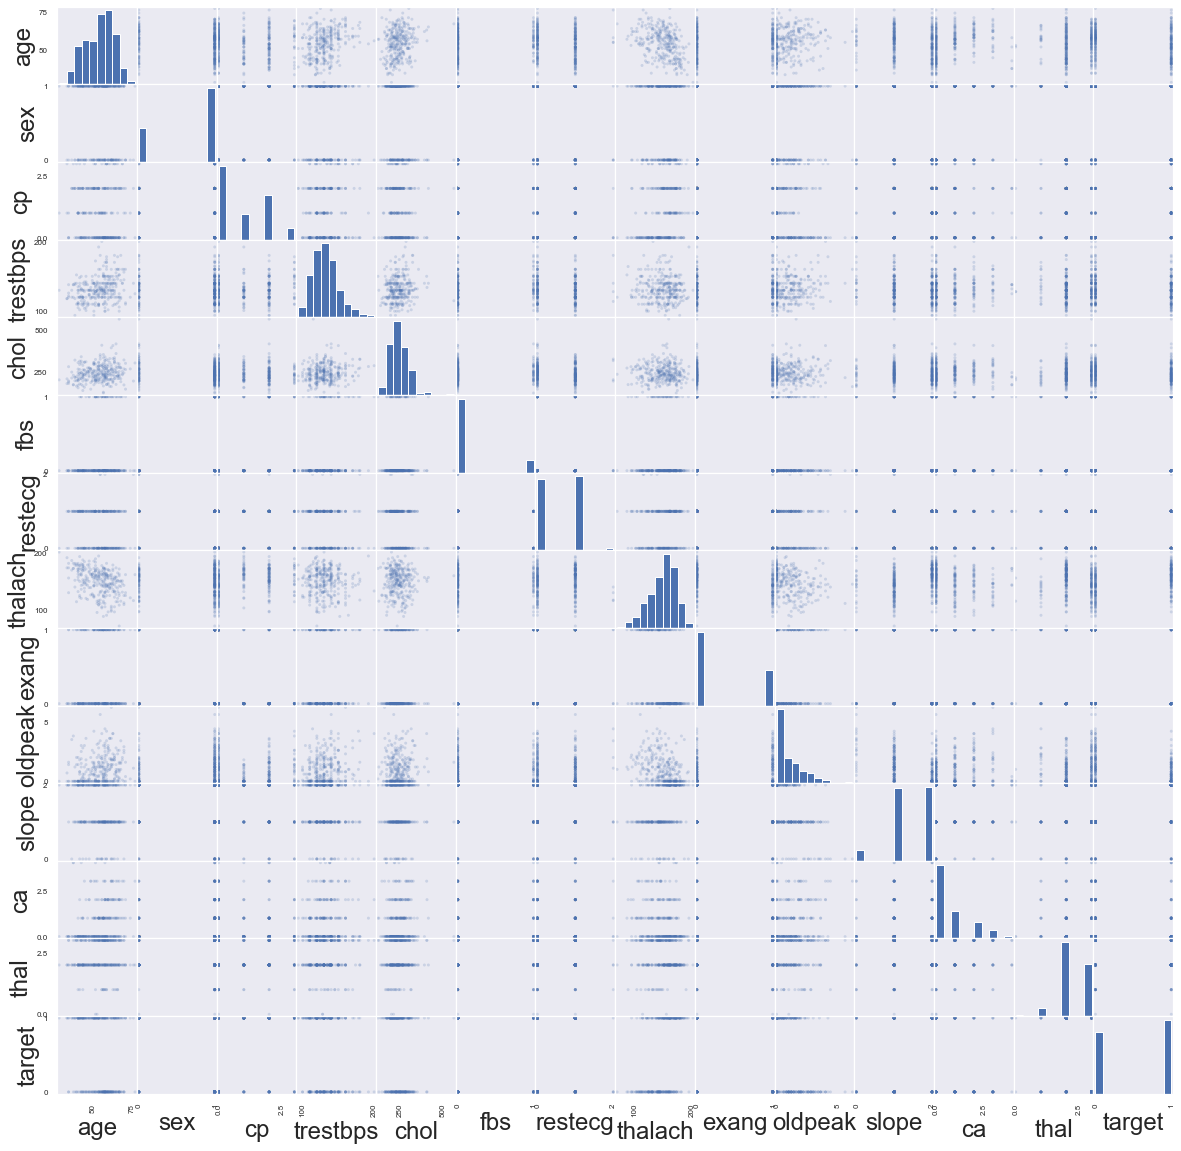

In [22]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df , alpha = 0.2 , figsize=(20,20))

## 4. Data PreProcessing <a id=14></a>

#### 4.1. Standarization <a id=15></a>


Let's split again automatically the data between two lists; 

In [23]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

**Here, we will first remove the target column from our list of features before categorizing all of the categorical variables using the obtain dummies method, which will produce two distinct columns for the X variable if it has two different sorts of unique values.**

In [24]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


___
**Now, let's standardize the data in some easy steps!**

> StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.
> Standardize generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.

> ***The good news*** here is that Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format. We initially build an object of the StandardScaler() method in accordance with the aforementioned syntax. Additionally, we normalize the data by using fit transform() together with the provided object.
The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 
___

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


***Lets check the standart deviation!!***
> The standard deviation is a measure of how evenly distributed the numbers are. The majority of the data are likely close to the mean (average) value if the standard deviation is low. When the standard deviation is high, the values are more evenly distributed.

> *Here the expected result after standardization is 1*

In [26]:
dfs[col_to_scale].std()

age         1.001654
trestbps    1.001654
chol        1.001654
thalach     1.001654
oldpeak     1.001654
dtype: float64

___
## 5. Modeling  <a id=16></a>

> A Python module called Scikit-learn offers a variety of supervised and unsupervised learning techniques. It is based on a number of technologies that you may already be acquainted with, including NumPy, pandas, and Matplotlib. Scikit-learn is a free machine learning package for the Python programming language (formerly known as scikits.learn and also referred to as sklearn). Support-vector machines, random forests, gradient boosting, k-means, and DBSCAN are just a few of the classification, regression, and clustering algorithms it offers. It is also built to work with Python's NumPy and SciPy scientific and numerical libraries.

> The functionality that scikit-learn provides include:

> **Regression,** including Linear and Logistic Regression.

> **Classification,** including K-Nearest Neighbors,..

> **Clustering,** including K-Means and K-Means++

___

> *As our system are in the title of Classification , Let's start model it.*

### Dividing into a Training Set and Test Set
> Let's imagine that this dataset is real and that learning a model and assessing it are our goals. In order to establish a held-out test set that we won't even look at until assessment, we will first partition our dataset.

In [27]:
# put aside 20% of the data for a final testing evaluation
from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size = 0.2, random_state = 99)
X = dfs.drop('target', axis=1)
y = dfs.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size: ", len(X_train), type(X_train))
print("Testing set size: ", len(X_test), type(X_test))


Training set size:  212 <class 'pandas.core.frame.DataFrame'>
Testing set size:  91 <class 'pandas.core.frame.DataFrame'>


## 5.1 K-Nearest Neighbors Classifier  <a id=17></a>
> The k-nearest neighbors algorithm, sometimes referred to as KNN or k-NN, is a supervised learning classifier that employs proximity to produce classifications or predictions about the grouping of a single data point.

> The K-Nearest Neighbors (KNN) algorithm is a technique used for regression or classification. The k closest training instances in the feature space make up the input in both scenarios. Find the points that have the closest features to the new, unidentified observation, then identify the dominating class.

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import time

# get the start time
st = time.time()
from sklearn.neighbors import KNeighborsClassifier
X = dfs.drop('target', axis=1)
y = dfs.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
knn_Accuracy = accuracy_score(y_test,y_pred1)
print("Accuracy score: ",knn_Accuracy)
print("_____________")
print(classification_report(y_test,y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred1))
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Accuracy score:  0.8571428571428571
_____________
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Confusion Matrix: 
[[35  6]
 [ 7 43]]
Execution time: 1.1280124187469482 seconds


### Running Experiments on Training Data

Let's run a few cross-validation experiments on our training data to see which parameters work best.

The parameters of nearest neighbors that can be varied include:
* number of neighbors
* weights: uniform vs. distance
* distance metric

In [29]:
experiment_configs = {
    'n_neighbors' : [1,3,7,10,60],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2]   # 1 = manhatten, 2 = euclidean
}
experiment_results={}

In [30]:
for k in experiment_configs['n_neighbors']:
    for w in experiment_configs['weights']:
        for p in experiment_configs['p']:
            # set parameters of new model
            model = KNeighborsClassifier(n_neighbors=k,
                                        weights=w,
                                        algorithm='brute',
                                        p=p)
            # train model
            model.fit(X_train, y_train) 
            # score model
            accuracy = model.score(X_train, y_train)
            # record results
            experiment_results[str(k) + ' ' + w + ' ' + str(p)] = accuracy

In [31]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(experiment_results)

{   '1 distance 1': 1.0,
    '1 distance 2': 1.0,
    '1 uniform 1': 1.0,
    '1 uniform 2': 1.0,
    '10 distance 1': 1.0,
    '10 distance 2': 1.0,
    '10 uniform 1': 0.8537735849056604,
    '10 uniform 2': 0.8349056603773585,
    '3 distance 1': 1.0,
    '3 distance 2': 1.0,
    '3 uniform 1': 0.9056603773584906,
    '3 uniform 2': 0.9009433962264151,
    '60 distance 1': 1.0,
    '60 distance 2': 1.0,
    '60 uniform 1': 0.8301886792452831,
    '60 uniform 2': 0.7971698113207547,
    '7 distance 1': 1.0,
    '7 distance 2': 1.0,
    '7 uniform 1': 0.8820754716981132,
    '7 uniform 2': 0.8773584905660378}


##  cross-validation

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
%%time

experiment_results = {}
for k in experiment_configs['n_neighbors']:
    for w in experiment_configs['weights']:
        for p in experiment_configs['p']:
            # set parameters of new model
            model = KNeighborsClassifier(n_neighbors=k,
                                        weights=w,
                                        algorithm='brute',
                                        p=p)
            # score model
            scores = cross_val_score(model,              # model settings
                                     X_train,    # predictor features
                                     y_train,   # target class
                                     cv=10)              # number of folds
            
            # record results
            experiment_results[str(k) + ' ' + w + ' ' + str(p)] = [scores.mean()]

CPU times: total: 9.19 s
Wall time: 4.54 s


In [34]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(experiment_results)

{   '1 distance 1': [0.7781385281385281],
    '1 distance 2': [0.7686147186147186],
    '1 uniform 1': [0.7781385281385281],
    '1 uniform 2': [0.7686147186147186],
    '10 distance 1': [0.8532467532467531],
    '10 distance 2': [0.8155844155844155],
    '10 uniform 1': [0.8484848484848484],
    '10 uniform 2': [0.8155844155844155],
    '3 distance 1': [0.848917748917749],
    '3 distance 2': [0.811038961038961],
    '3 uniform 1': [0.848917748917749],
    '3 uniform 2': [0.811038961038961],
    '60 distance 1': [0.82012987012987],
    '60 distance 2': [0.7872294372294373],
    '60 uniform 1': [0.8248917748917748],
    '60 uniform 2': [0.7777056277056277],
    '7 distance 1': [0.8487012987012987],
    '7 distance 2': [0.811038961038961],
    '7 uniform 1': [0.8487012987012987],
    '7 uniform 2': [0.811038961038961]}


## Gaussian Naive Bayes <a id=18></a>
> The Bayes Theorem is the foundation of Naive Bayes Classifiers. Strong independence assumptions between the characteristics are one presumption used. These classifiers make the erroneous assumption that the value of one feature is unrelated to the value of any other feature. Naive Bayes Classifiers are learned effectively in supervised learning environments. A modest amount of training data is required for naive Bayed classifiers in order to estimate the classification parameters. Naive Bayes Classifiers are easy to create and use, and they can be used in a variety of real-world scenarios.
>The assumption that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution is frequently made when working with continuous data. 

In [35]:
from sklearn.naive_bayes import GaussianNB
import time

# get the start time
st = time.time()
hdp = GaussianNB()

# train on the first 260 people
#hdp.fit(df.iloc[:250,0:12], df.iloc[:250,13])
hdp.fit(X_train, y_train)

GaussianNB()

In [36]:
# try to predict whether other 44 people have heart disease or not 
predicted = hdp.predict(X_test)
#predicted
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.07199740409851074 seconds


In [37]:
hdp.predict_proba(X_test)

array([[1.00000000e+00, 1.52691621e-14],
       [9.84150244e-01, 1.58497562e-02],
       [9.80414831e-01, 1.95851691e-02],
       [1.00000000e+00, 9.96456934e-16],
       [1.26706476e-01, 8.73293524e-01],
       [5.92531112e-03, 9.94074689e-01],
       [9.99367459e-01, 6.32541042e-04],
       [1.00000000e+00, 1.53730254e-21],
       [1.00000000e+00, 5.86896170e-18],
       [9.99472323e-01, 5.27676775e-04],
       [9.99998838e-01, 1.16240731e-06],
       [9.99999988e-01, 1.21564613e-08],
       [3.50420634e-04, 9.99649579e-01],
       [9.99999999e-01, 1.05007375e-09],
       [5.51954381e-06, 9.99994480e-01],
       [1.91296349e-03, 9.98087037e-01],
       [1.12725669e-06, 9.99998873e-01],
       [9.99999993e-01, 6.56368479e-09],
       [1.00000000e+00, 9.04966563e-18],
       [1.00000000e+00, 7.52550088e-13],
       [9.89136366e-01, 1.08636339e-02],
       [1.00000000e+00, 1.79582234e-10],
       [9.99952592e-01, 4.74078256e-05],
       [9.99913656e-01, 8.63436745e-05],
       [5.006655

In [38]:
print("Accuracy rate:")
NB_Accuracay = hdp.score(X_test, y_test)
NB_Accuracay

Accuracy rate:


0.6813186813186813

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        41
           1       0.86      0.50      0.63        50

    accuracy                           0.68        91
   macro avg       0.73      0.70      0.68        91
weighted avg       0.74      0.68      0.67        91

Confusion Matrix: 
[[37  4]
 [25 25]]


## Logistic Regression Classifier <a id=19></a>
> A statistical analysis method called logistic regression uses previous observations from a data set to predict a binary outcome, such as yes or no.
By examining the correlation between one or more already present independent variables, a logistic regression model forecasts a dependent data variable. A logistic regression could be used, for instance, to forecast whether a candidate for office will win or lose, or if a high school student will be accepted into a particular institution or not. These simple choices between two options allow for binary outcomes.


In [40]:
# instantiating the object
from sklearn.linear_model import LogisticRegression
import time

# get the start time
st = time.time()
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
LR_Accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistric Regression is ", LR_Accuracy)

print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test,y_pred))
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

The test accuracy score of Logistric Regression is  0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

Confusion Matrix: 
[[33  8]
 [ 5 45]]
Execution time: 0.1360006332397461 seconds


## Decision Tree Classifier  <a id=20></a>
> The non-parametric supervised learning approach used for classification and regression applications is the decision tree. It is organized hierarchically and has a root node, branches, internal nodes, and leaf nodes.

In [41]:
from sklearn.tree import DecisionTreeClassifier
import time

# get the start time
st = time.time()
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
DT_Accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree is ", DT_Accuracy)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test,y_pred))
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

The test accuracy score of Decision Tree is  0.7802197802197802
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

Confusion Matrix: 
[[34  7]
 [13 37]]
Execution time: 0.056003570556640625 seconds


In [42]:
import sklearn.tree
X = df.drop('target', axis=1)
y = df['target']
model1 = sklearn.tree.DecisionTreeClassifier()
model1 = model1.fit(X, y)   # naming the decision tree 'model1', for lack of a better name
model1

DecisionTreeClassifier()

In [43]:
print(X.columns)
print(y.unique())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[1 0]


### What's GraphViz?
> An open-source Python tool called Graphviz is used to build graph objects that can be finished with various nodes and edges. It is based on the Graphviz software's DOT language, and using Python, we can download the graph's source code in DOT language.

In [44]:
import graphviz
dot_data = sklearn.tree.export_graphviz(model1, out_file=None,
                         feature_names=X.columns,  
                         class_names=[str(x) for x in y],  
                         filled=True, rounded=True,  
                         special_characters=True)

In [45]:
import os
os.environ["PATH"] += os.pathsep +'C:/Program Files/Graphviz/bin'

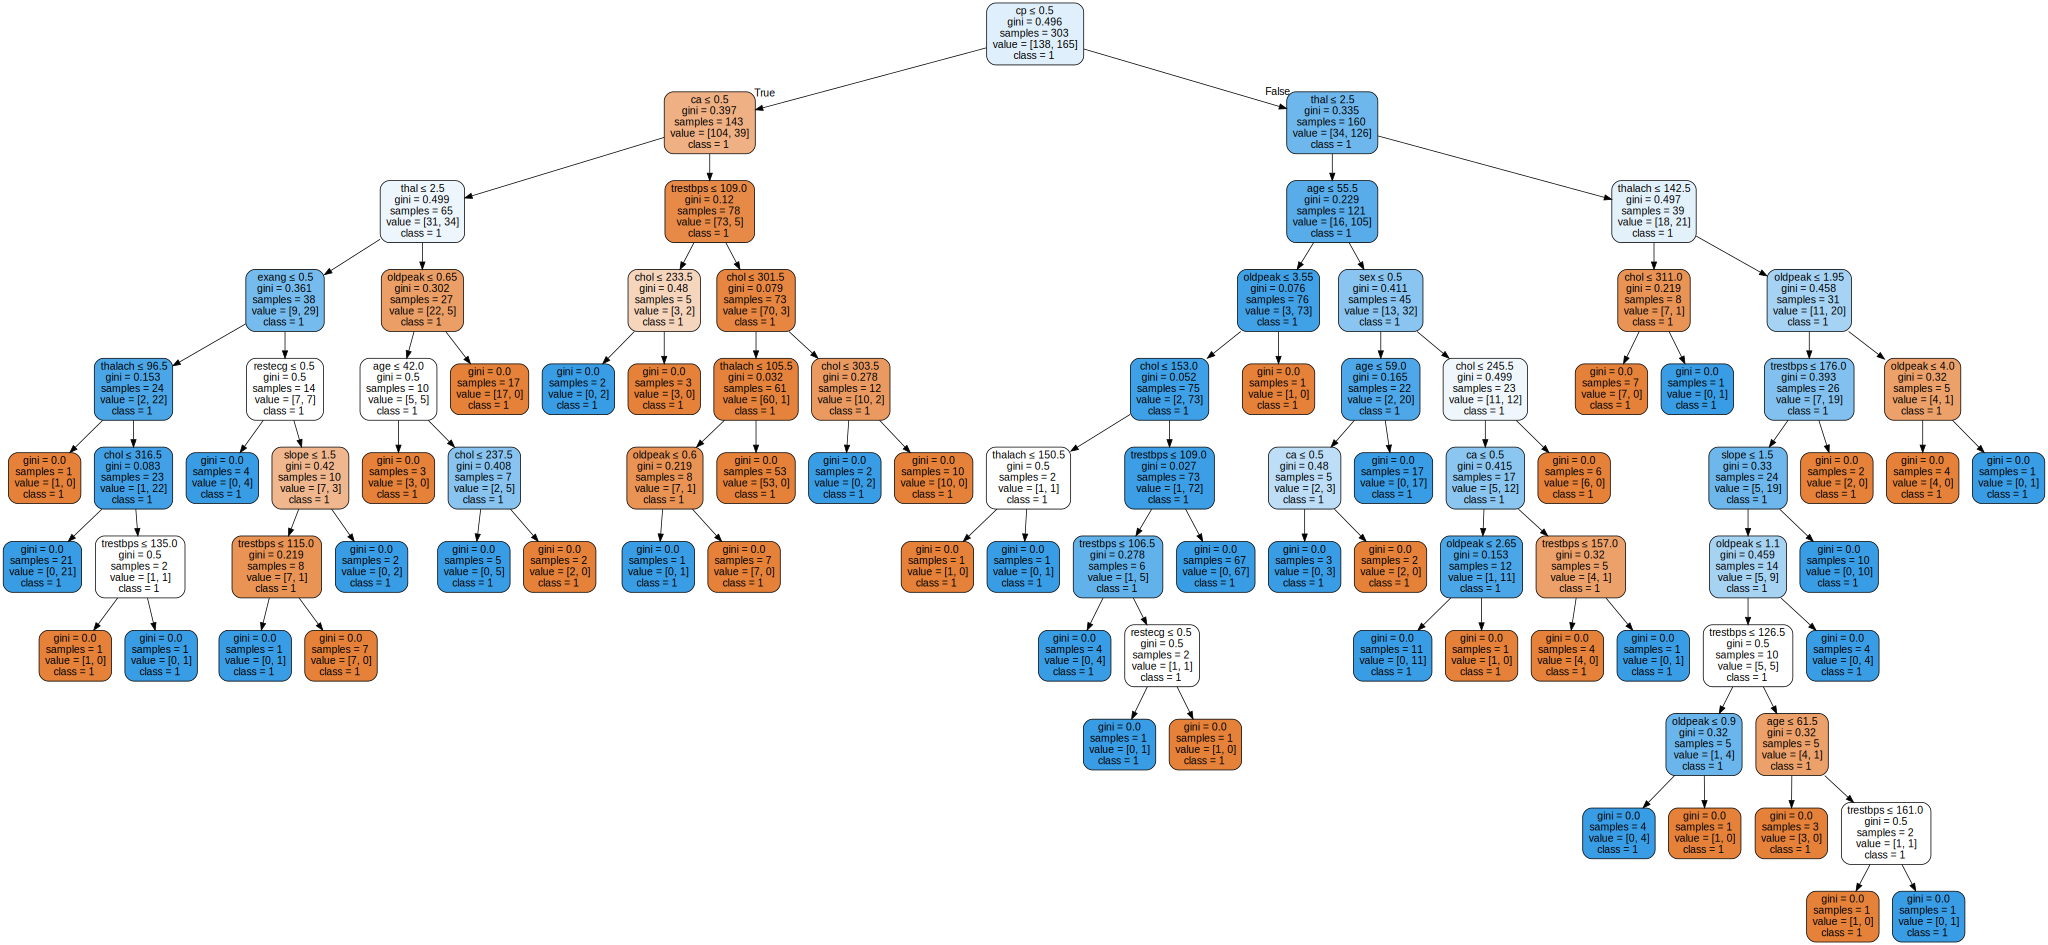

In [46]:
graph = graphviz.Source(dot_data)  
graph

## Random Forest Classifier  <a id=21></a>
> Supervised machine learning algorithms like random forest are frequently employed in classification and regression issues. On various samples, it constructs decision trees and uses their average for classification and majority vote for regression.
The Random Forest Algorithm's ability to handle data sets with both continuous variables, as in regression, and categorical variables, as in classification, is one of its most crucial qualities. In terms of classification issues, it delivers superior outcomes.

In [47]:
from sklearn.ensemble import RandomForestClassifier
import time

# get the start time
st = time.time()
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
RF_Accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest is ", RF_Accuracy)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test,y_pred))
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

The test accuracy score of Random Forest is  0.8461538461538461
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix: 
[[35  6]
 [ 8 42]]
Execution time: 0.9840004444122314 seconds


## Gradient Boosting Classifier  <a id=22></a>
>A class of machine learning techniques known as gradient boosting classifiers combines a number of weak learning models to produce a powerful predicting model. Gradient boosting frequently makes use of decision trees. Due to their success in categorizing large datasets, gradient boosting models are gaining popularity and have lately been successful in numerous Kaggle data science challenges.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
# instantiate the classifier
import time

# get the start time
st = time.time()
gbt = GradientBoostingClassifier(n_estimators =100,max_depth=--1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
GB_Accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Classifier is ", GB_Accuracy)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test,y_pred))
et = time.time()# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

The test accuracy score of Gradient Boosting Classifier is  0.8461538461538461
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix: 
[[33  8]
 [ 6 44]]
Execution time: 0.7120006084442139 seconds


# **6. Models Evaluation**  <a id=23></a>

***Let's Compare now our 6 algorithms based on the accuracy rate.***

In [49]:
print(knn_Accuracy)
print(NB_Accuracay)
print(LR_Accuracy)
print(DT_Accuracy)
print(RF_Accuracy)
print(GB_Accuracy)

0.8571428571428571
0.6813186813186813
0.8571428571428571
0.7802197802197802
0.8461538461538461
0.8461538461538461


In [50]:
x = ('kNN',
    'NB', 
    'LR',
    'DT',
    'RF',
    'GB')

In [51]:
y=(knn_Accuracy,
    NB_Accuracay, 
LR_Accuracy,
     DT_Accuracy,
    RF_Accuracy,
    GB_Accuracy)

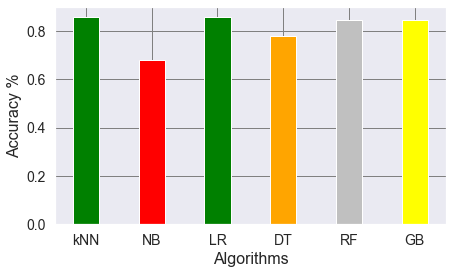

In [63]:
colors = ['green','red','green','orange','silver','yellow','orange',]
plt.figure(figsize=(7,4))
plt.tick_params(labelsize=14)

plt.bar(x,y,width=0.4,color = colors) # A bar chart
plt.xlabel('Algorithms', fontsize=16)
plt.ylabel('Accuracy %', fontsize=16)
plt.grid(color='gray')
plt.show()

# 7. Conclusion  <a id=24></a>

> + KNN and LR gives the best Accuracy compared to other models. 
> + LR is the most precise
> + Chest pain and thalach is major symptoms of heart attack 
> + Decision Tree does not give a good accuracy because it is overfit 


***You reach the end of our NoteBook !
THANK YOU!***
